# Compare Python and Fortran outputs
Note: Fortran GMET outputs are based on the latest run based on compiled GMET on Cheyenne. The outputs contained in the compressed file seem out of date.

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
from array import array
import matplotlib.pyplot as plt

## Only static predictors are used
['latitude', 'longitude', 'elev', 'gradient_n_s', 'gradient_w_e']
For precipitation (box-cox), current verison of Fortran GMET forces transformed precipitation to zero while the transformation exponent (-4) should be used. 

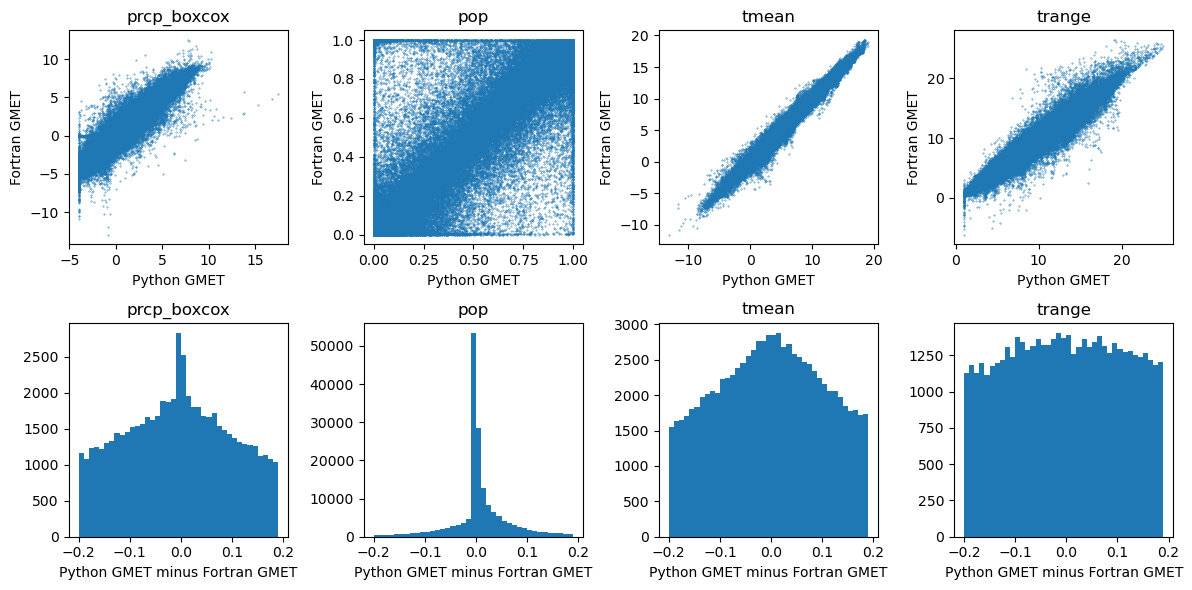

In [22]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/NewtestSKLL_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_static.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    axi.scatter(d1,d2, 0.1)
    axi.set_xlabel('Python GMET')
    axi.set_ylabel('Fortran GMET')
    axi.set_title(varpy[i])
    
    axi = axs[1, i]
    axi.hist(d1-d2, np.arange(-0.2, 0.2, 0.01))
    axi.set_xlabel('Python GMET minus Fortran GMET')
    axi.set_title(varpy[i])

plt.tight_layout()
plt.show()

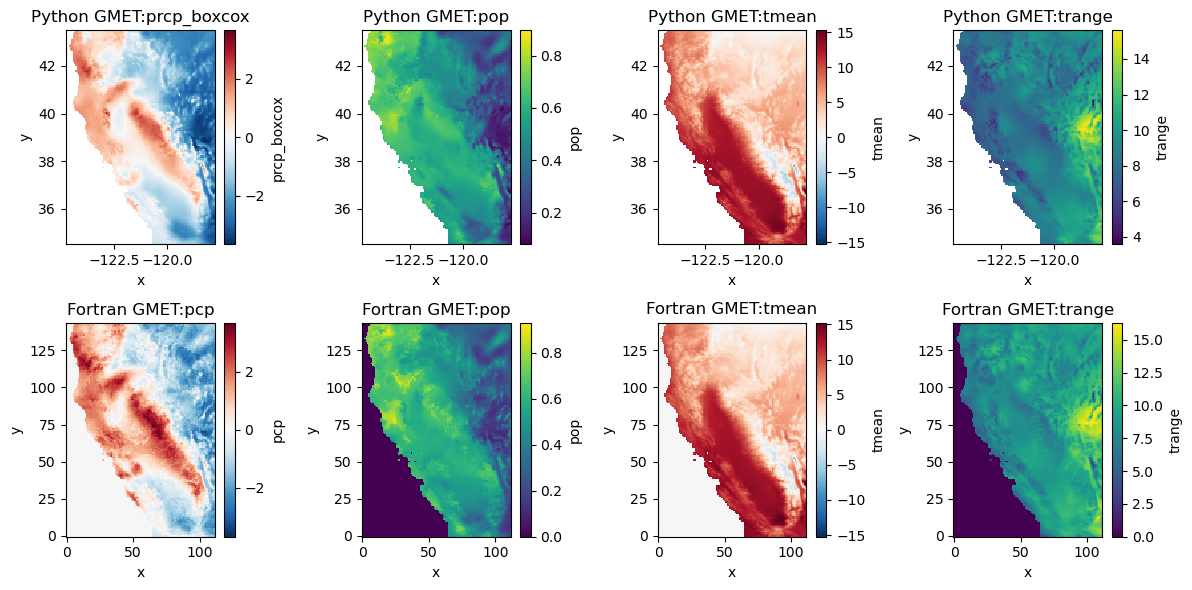

In [23]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/NewtestSKLL_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_static.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    dspy[varpy[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Python GMET:'+varpy[i])
    
    axi = axs[1, i]
    dsft[varft[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Fortran GMET:'+varft[i])

plt.tight_layout()
plt.show()

## Dynamic + static factors are used
Dynamic factors are 'cube_root_prec_rate' and 'tmp_2m'. Grid-point match uses nearest neighbor method. Don't transform precipitation.

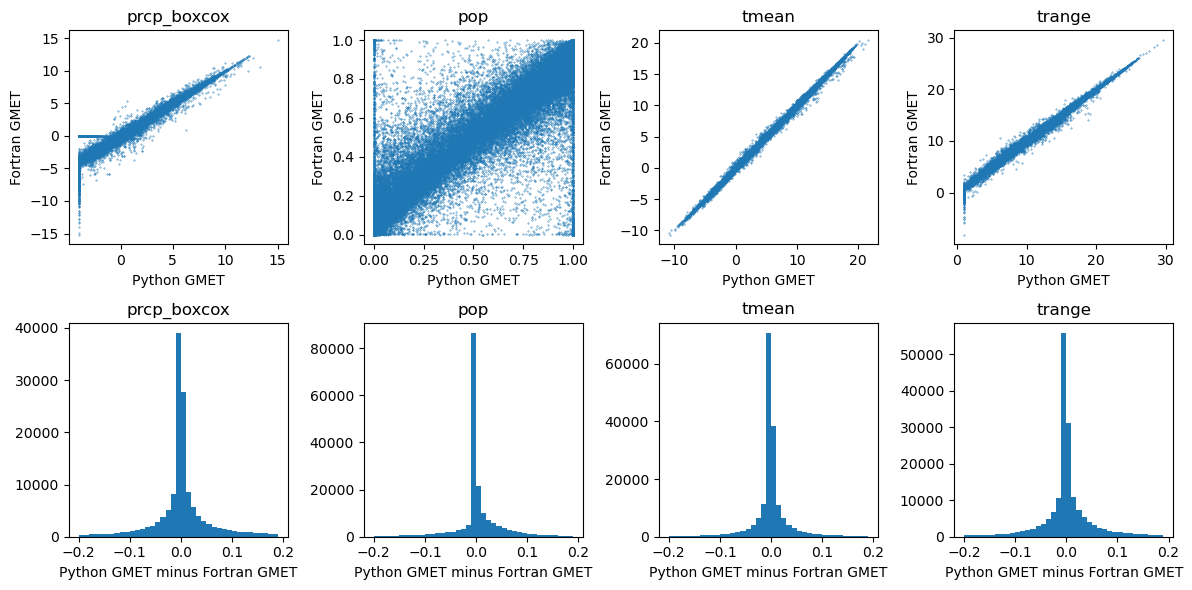

In [16]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/NewtestDyn_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    axi.scatter(d1,d2, 0.1)
    axi.set_xlabel('Python GMET')
    axi.set_ylabel('Fortran GMET')
    axi.set_title(varpy[i])
    
    axi = axs[1, i]
    axi.hist(d1-d2, np.arange(-0.2, 0.2, 0.01))
    axi.set_xlabel('Python GMET minus Fortran GMET')
    axi.set_title(varpy[i])

plt.tight_layout()
plt.show()

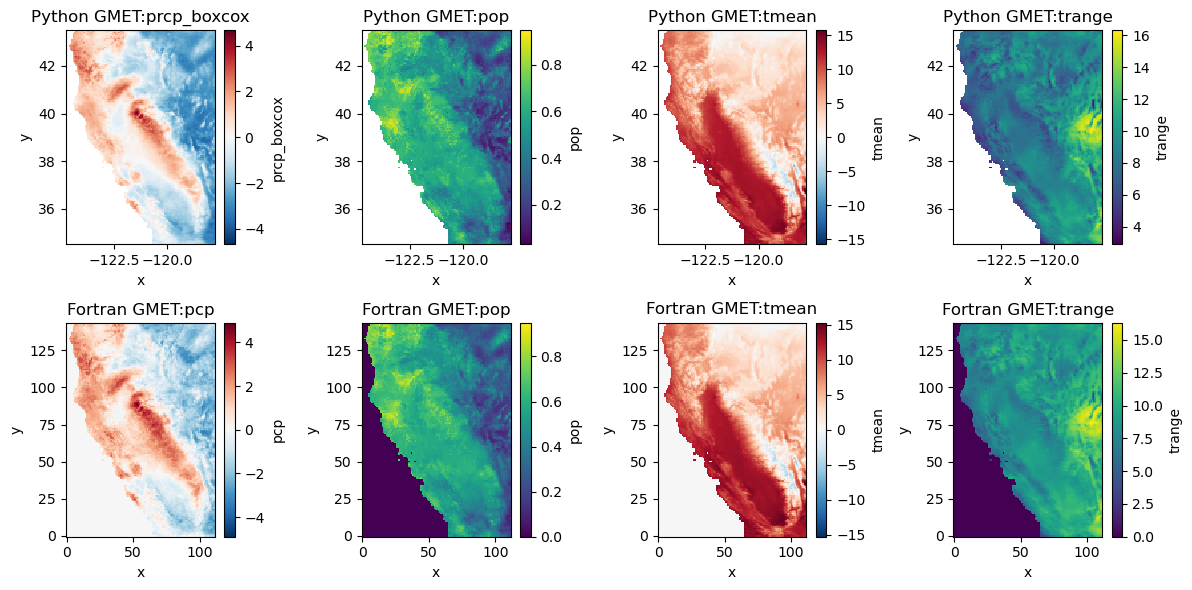

In [8]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/NewtestDyn_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    dspy[varpy[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Python GMET:'+varpy[i])
    
    axi = axs[1, i]
    dsft[varft[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Fortran GMET:'+varft[i])

plt.tight_layout()
plt.show()

## Dynamic + static factors are used. Dynamic precipitation undergoes box cox transformation.

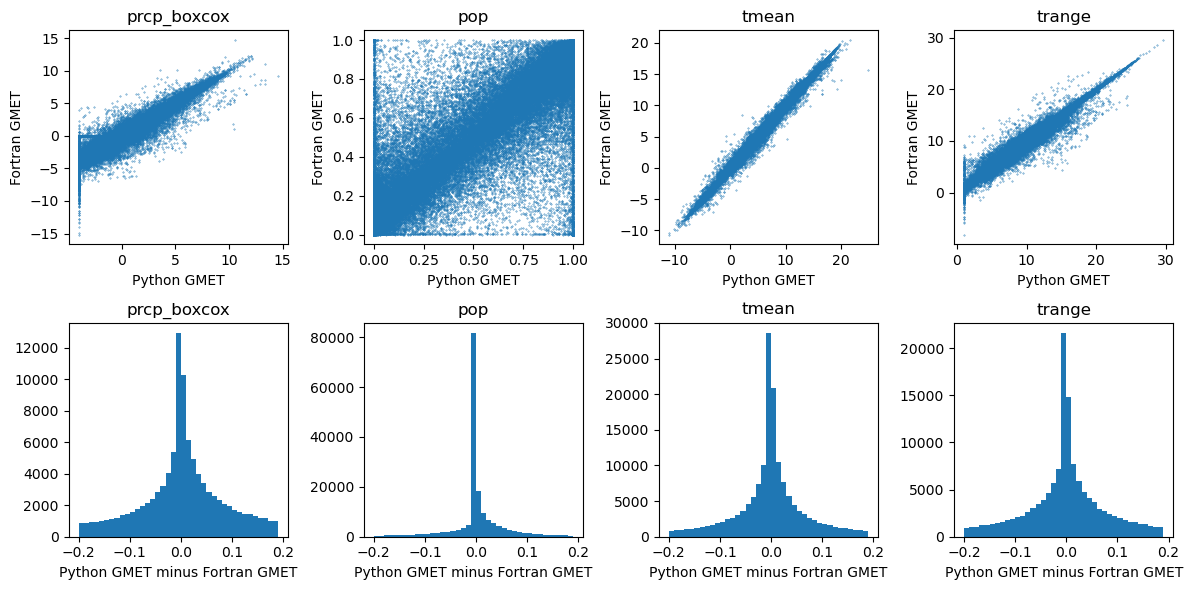

In [92]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/LWLRdynamic_boxcoxP_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    axi.scatter(d1,d2, 0.1)
    axi.set_xlabel('Python GMET')
    axi.set_ylabel('Fortran GMET')
    axi.set_title(varpy[i])
    
    axi = axs[1, i]
    axi.hist(d1-d2, np.arange(-0.2, 0.2, 0.01))
    axi.set_xlabel('Python GMET minus Fortran GMET')
    axi.set_title(varpy[i])

plt.tight_layout()
plt.show()

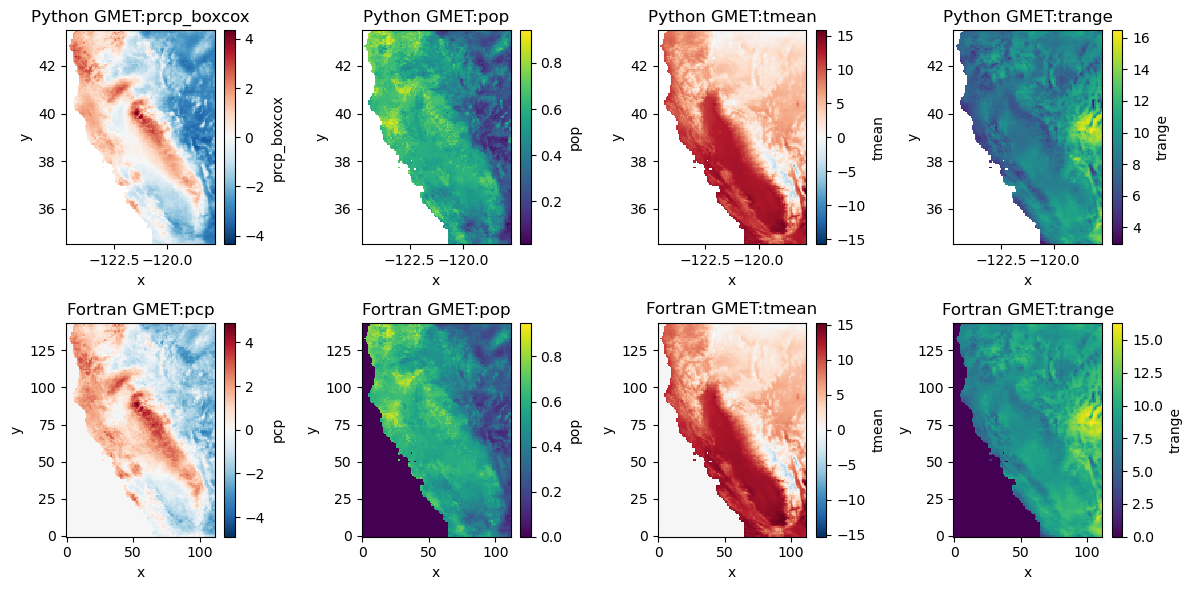

In [93]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/LWLRdynamic_boxcoxP_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    dspy[varpy[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Python GMET:'+varpy[i])
    
    axi = axs[1, i]
    dsft[varft[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Fortran GMET:'+varft[i])

plt.tight_layout()
plt.show()

## Fortran GMET VS Python Random Forest GMET: Static predictors

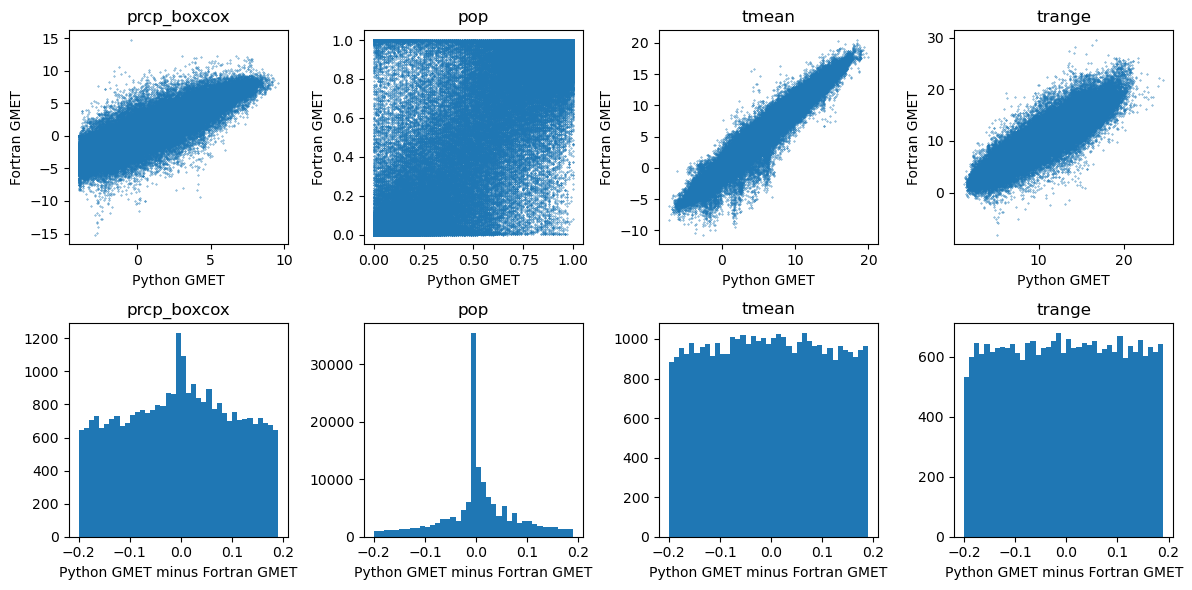

In [95]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/RFstatic_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    axi.scatter(d1,d2, 0.1)
    axi.set_xlabel('Python GMET')
    axi.set_ylabel('Fortran GMET')
    axi.set_title(varpy[i])
    
    axi = axs[1, i]
    axi.hist(d1-d2, np.arange(-0.2, 0.2, 0.01))
    axi.set_xlabel('Python GMET minus Fortran GMET')
    axi.set_title(varpy[i])

plt.tight_layout()
plt.show()

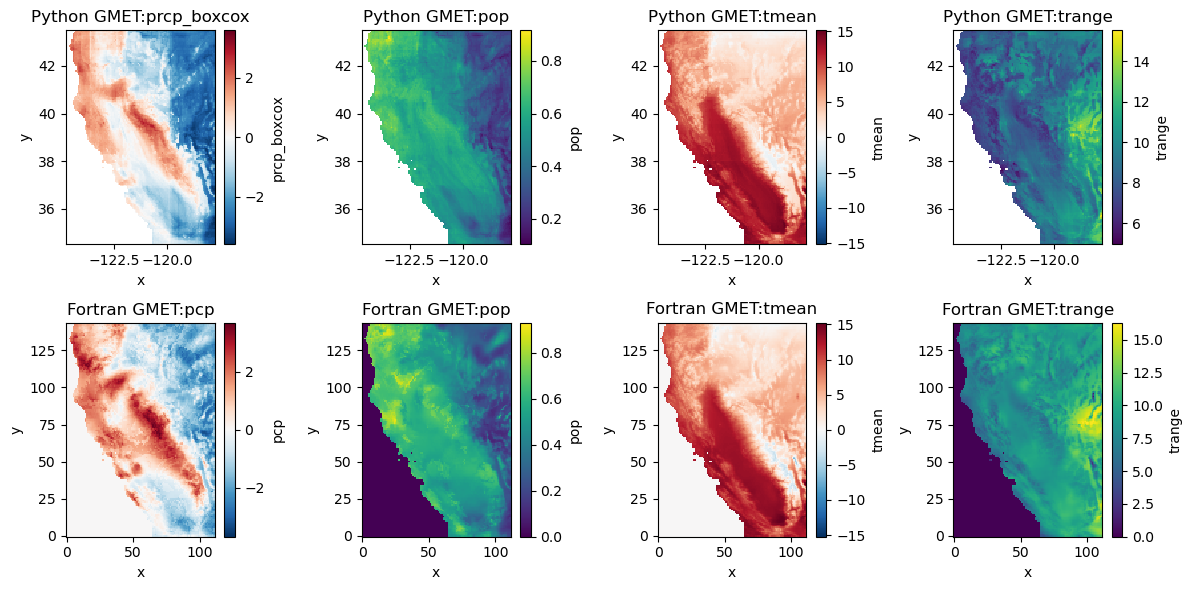

In [97]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/RFstatic_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_static.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    dspy[varpy[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Python GMET:'+varpy[i])
    
    axi = axs[1, i]
    dsft[varft[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Fortran GMET:'+varft[i])

plt.tight_layout()
plt.show()

## Fortran GMET VS Python Random Forest GMET: Dynamic predictors

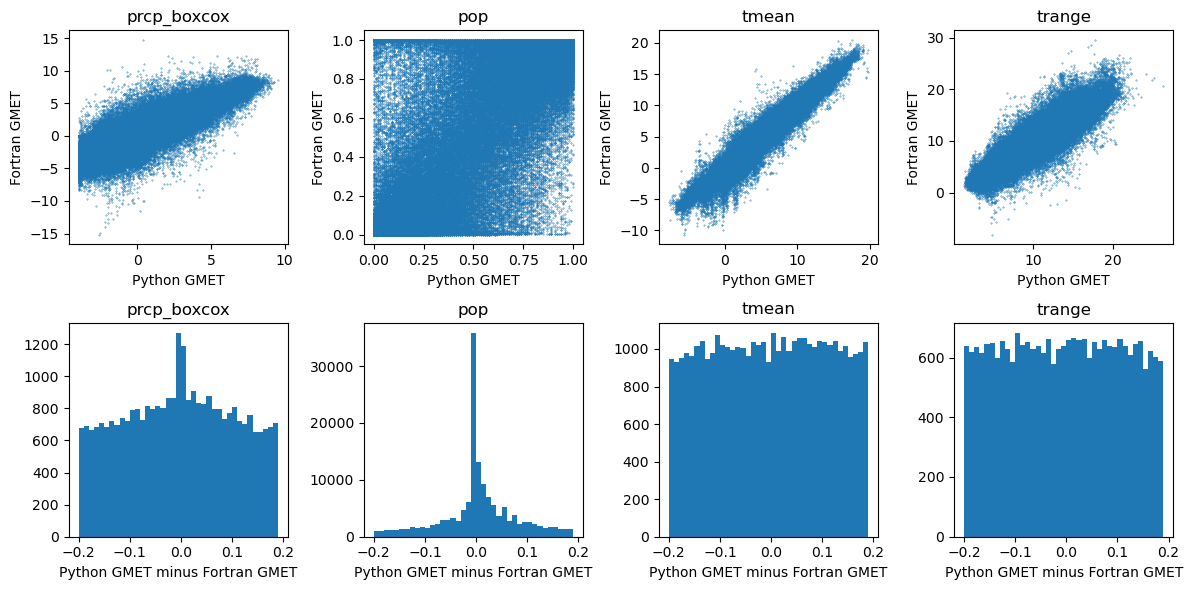

In [99]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/RFdynamic_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    axi.scatter(d1,d2, 0.1)
    axi.set_xlabel('Python GMET')
    axi.set_ylabel('Fortran GMET')
    axi.set_title(varpy[i])
    
    axi = axs[1, i]
    axi.hist(d1-d2, np.arange(-0.2, 0.2, 0.01))
    axi.set_xlabel('Python GMET minus Fortran GMET')
    axi.set_title(varpy[i])

plt.tight_layout()
plt.show()

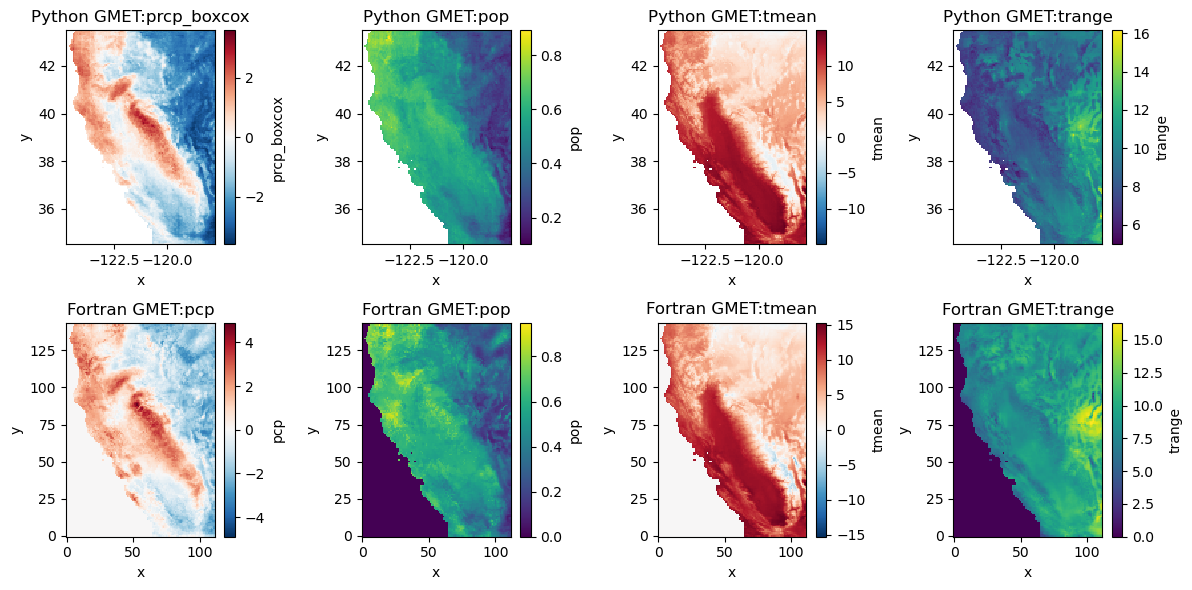

In [100]:
infile_py = '../../test_cases/cali2017/PyGMET_output/regression_outputs/RFdynamic_Grid_Regression_20170201-20170215.nc'
infile_ft = 'regress_ts.nwp.xv_dynamic.nc'

dspy = xr.load_dataset(infile_py)
dsft = xr.load_dataset(infile_ft)

varpy = ['prcp_boxcox', 'pop', 'tmean', 'trange']
varft = ['pcp', 'pop', 'tmean', 'trange']

fig, axs = plt.subplots(2, 4, figsize=[12, 6])

for i in range(4):
    
    d1 = dspy[varpy[i]].values.transpose([2,0,1])
    d2 = dsft[varft[i]].values
    d1 = d1.flatten()
    d2 = d2.flatten()
    
    axi = axs[0, i]
    dspy[varpy[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Python GMET:'+varpy[i])
    
    axi = axs[1, i]
    dsft[varft[i]].mean(dim='time').plot(ax=axi)
    axi.set_title('Fortran GMET:'+varft[i])

plt.tight_layout()
plt.show()

In [25]:
infile1 = '../../test_cases/cali2017/PyGMET_output/stn_info/all_stn_weight_old.nc'
infile2 = '../../test_cases/cali2017/PyGMET_output/stn_info/all_stn_weight.nc'
ds1=xr.load_dataset(infile1)
ds2=xr.load_dataset(infile2)

In [30]:
for v in ds1.data_vars:
    if 'near' in ds1[v].dims:
        diff = ds1[v].values-ds2[v].values
        print(np.nanmax(np.abs(diff)))

0.0
0.0
0.0
0.0
0.0
0.0
